In [5]:
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential 

In [6]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
import matplotlib.pyplot as plt
import numpy as np


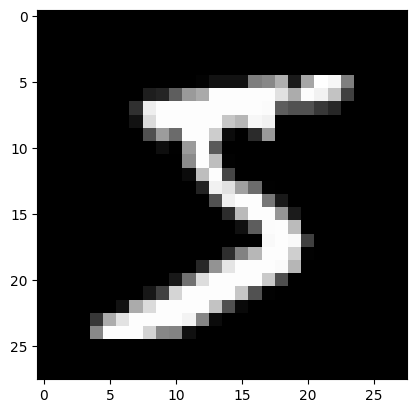

In [8]:
plt.imshow(x_train[0],cmap='gray')


In [9]:
x_train= x_train.reshape(x_train.shape[0],28*28)
x_test= x_test.reshape(x_test.shape[0],28*28)


In [10]:
x_train.shape

(60000, 784)

In [11]:
x_train,x_test = x_train/255.0,x_test/255.0

In [12]:

y_train.shape

(60000,)

In [13]:
logreg= LogisticRegression(max_iter=100)


In [14]:
logreg.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred= logreg =logreg.predict(x_test)

In [16]:
from sklearn.metrics import  accuracy_score

In [17]:
accuracy= accuracy_score(y_test,y_pred)

In [18]:
print('accuracy ',accuracy)

accuracy  0.9258


In [19]:
from sklearn.svm import SVC

In [20]:
svc = SVC(max_iter=100)
svc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=100)

In [21]:
y_pred_svc= svc.predict(x_test)

In [22]:
accuracy_svc = accuracy_score(y_test,y_pred_svc)

In [23]:
print(accuracy_svc)

0.9271


In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm_svc = confusion_matrix(y_test,y_pred_svc)

In [26]:
cm_svc

array([[ 972,    0,    1,    0,    0,    1,    2,    1,    3,    0],
       [   0, 1120,    2,    1,    0,    0,    1,    0,   10,    1],
       [   8,    2,  981,   13,    1,    0,    2,   15,    9,    1],
       [   0,    0,   10,  935,    1,   18,    0,    4,   22,   20],
       [   1,    0,    2,    0,  850,    0,    6,    2,    1,  120],
       [   7,    1,    3,   24,    2,  820,    9,    1,   20,    5],
       [   7,    2,    2,    0,    1,    3,  938,    0,    5,    0],
       [   1,    6,    5,   10,    3,    0,    0,  819,    0,  184],
       [   5,    1,   19,   12,    0,    2,    2,    4,  914,   15],
       [   8,    3,    4,    7,   47,    2,    0,    7,    9,  922]])

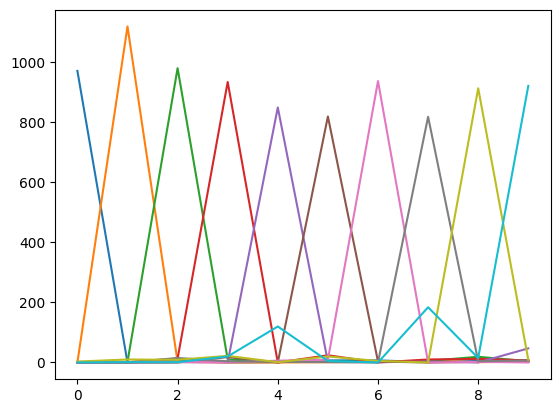

In [27]:
plt.plot(cm_svc)


<Axes: >

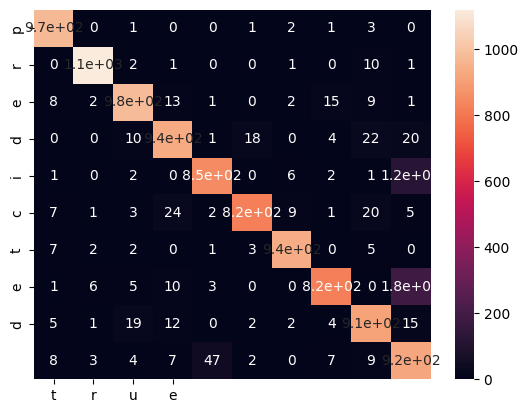

In [28]:
import seaborn as sns
sns.heatmap(cm_svc, annot=True,
            xticklabels='true',yticklabels='predicted')


In [29]:
model = Sequential()
#input layer
model.add(Dense(128,activation='relu', input_shape=(28*28,)))
model.add(Dense(64,activation='relu', ))
model.add(Dense(10,activation='softmax',))


In [30]:
x_train.shape

(60000, 784)

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,
          epochs=3,batch_size=32,
          validation_data=(x_test, y_test)
)

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2477 - accuracy: 0.9273 - val_loss: 0.1226 - val_accuracy: 0.9629
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1041 - accuracy: 0.9681 - val_loss: 0.1051 - val_accuracy: 0.9663
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0721 - accuracy: 0.9776 - val_loss: 0.0830 - val_accuracy: 0.9740


In [32]:
from sklearn.metrics import f1_score,precision_score,recall_score

test_loss,test_acc = model.evaluate(x_test,y_test)
y_pred_nn = model.predict(x_test)
f1_score_nn = f1_score(y_test,np.argmax(y_pred_nn,axis= 1),
                       average= 'weighted')

precison = precision_score(y_test
                           ,np.argmax(y_pred_nn,axis=1),
                           average= 'weighted')
recall =recall_score(y_test,np.argmax(y_pred_nn,axis=1),average= 'weighted')

313/313 [==============================] - 1s 1ms/step


In [33]:
print(test_loss)

0.08300556242465973


In [34]:
print(test_acc)


0.9739999771118164


In [35]:
print(test_loss)

0.08300556242465973


In [36]:
print(f1_score_nn)

0.9739797576664001


In [37]:
from sklearn.metrics import classification_report

In [38]:
cr = classification_report(y_test,np.argmax(y_pred_nn,axis= 1))
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.95      0.97      1028
           8       0.98      0.95      0.96       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [39]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

In [40]:
x_train_cnn = x_train.reshape((x_train.shape[0],28,28,1))
x_test_cnn = x_test.reshape((x_test.shape[0],28,28,1))

y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)



In [41]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32,(3,3),
                     activation ='relu',
                     input_shape=(28,28,1)))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Conv2D(64,(3,3),
                      activation ='relu'))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Flatten())


In [42]:
model_cnn.add(Dense(64,activation='relu'))
model_cnn.add(Dense(10,activation='softmax'))


In [43]:
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [46]:
model_cnn.fit(x_train_cnn,y_train_cnn, 
              epochs=2,
              batch_size=32,
              validation_data=(x_test_cnn,y_test_cnn),
              )

Epoch 1/2
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1453 - accuracy: 0.9554 - val_loss: 0.0635 - val_accuracy: 0.9800
Epoch 2/2
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0467 - accuracy: 0.9857 - val_loss: 0.0525 - val_accuracy: 0.9826
